## 11.2 항공 사진 내 선인장 식별 경진대회 탐색적 데이터 분석
- 항공 사진 내 선인장 식별 경진대회 링크

### 11.2.1 데이터 둘러보기

In [1]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/2024-2-data-solution-ch-11/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')
labels.shape, submission.shape

((14500, 2), (3000, 2))

In [2]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


### 11.2.2 데이터 시각화

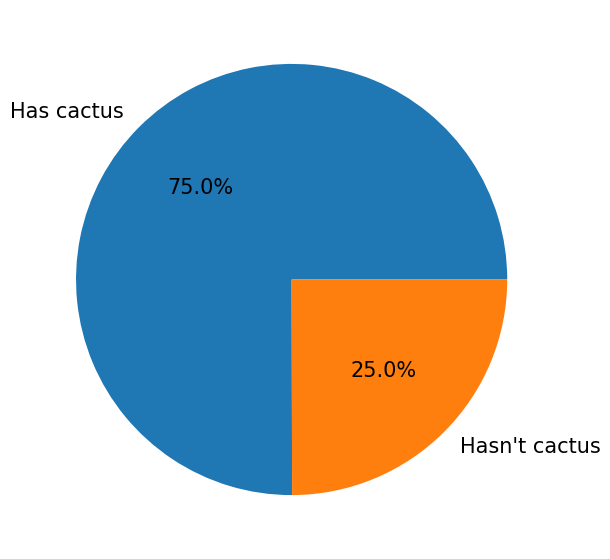

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

label = ['Has cactus', 'Hasn\'t cactus'] # 타깃값 레이블
# 타깃값 분포 파이 그래프
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%');

이미지 로드 및 출력

In [4]:
import os
path_train = '/kaggle/input/2024-2-data-solution-ch-11/train'
path_test = '/kaggle/input/2024-2-data-solution-ch-11/test'
num_train = len(os.listdir(path_train))
num_test = len(os.listdir(path_test))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 14500
테스트 데이터 개수: 3000


/kaggle/input/2024-2-data-solution-ch-11/train/d2eb98fb25e8a26b351fec2971617811.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2f1a5b5eea5a4b2de71406f22e590f4.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2f2c75ed875ce9486bd0b5d024ee212.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2f6d71d75b4f590a29e2b6f92e42811.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d30153c0c76deb08def18801108a7b90.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d30b3ad3c99e1b262fa405987fa3ae52.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d30f92e2c2c878e4bbc63a382f42f8d3.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d312cd7a74853f8e102228100e85fcdd.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d3174962904b8ffe7283cb076ca7ef69.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d31bc1686a16fcadce00275e016a6705.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d31eb22b5dcd1c2ba4cfb9c2edec6b02.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d32102c7d8239736fa701bda4521a

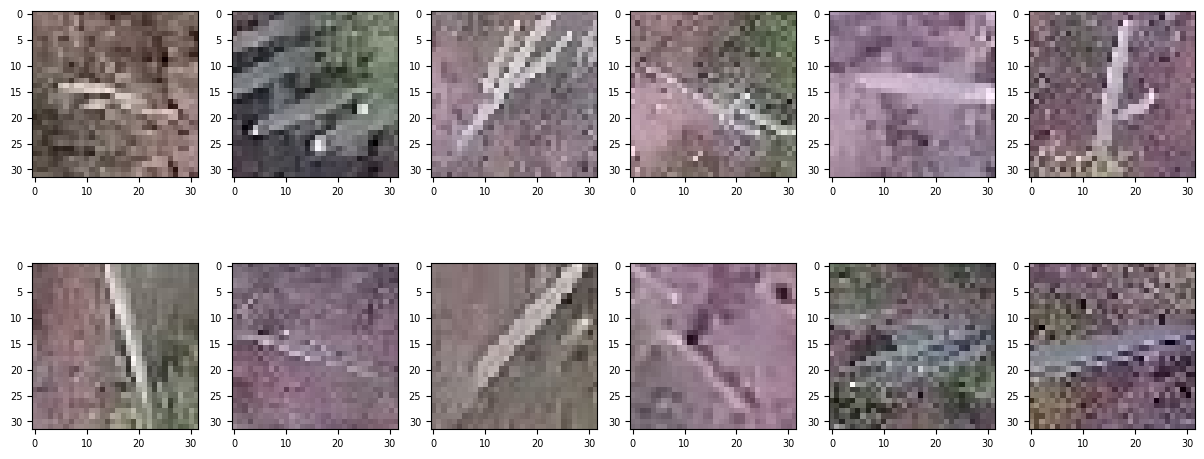

In [5]:
import matplotlib.gridspec as gridspec
import cv2 # OpenCV 라이브러리 임포트

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))    # 전체 Figure 크기 설정
grid = gridspec.GridSpec(2, 6) # 서브플롯 배치(2행 6열로 출력)
    
# 선인장을 포함하는 이미지 파일명(마지막 12개) 
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-12:]

# 이미지 출력 
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = path_train + '/' + img_name                 # 이미지 파일 경로
    print(img_path)
    image = cv2.imread(img_path)                   # 이미지 파일 읽기 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정 
    ax = plt.subplot(grid[idx])
    ax.imshow(image)                               # 이미지 출력 

/kaggle/input/2024-2-data-solution-ch-11/train/d2c571dba6f8670ea4f9c56f952ced1c.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2c91ab717d30daac87462ea9ae3b039.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2d1ba2dea43a2c8da46084018b98772.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2d9a849f9bbe6e119350625eb7f4a19.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2e08e707a55d601099fc664377f61e3.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2f6c379077aa4a1bdacbaaad29dc99b.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2f7559eea26e445b9446dbf9ef497ec.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d2fc1bfdfc3d7075c5e250f8e2a330af.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d3001014affc9965fa35596a14088aee.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d3014388c9ee8e63efba3428f5705529.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d308bfad3f481e35da24b513469092bf.jpg
/kaggle/input/2024-2-data-solution-ch-11/train/d3220b198155c41029f0cdbbe4828

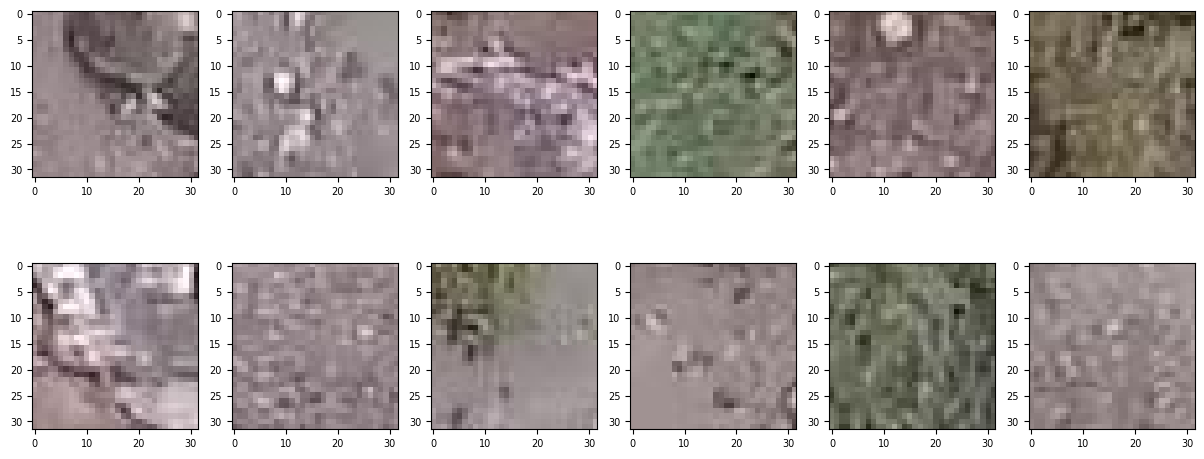

In [6]:
plt.figure(figsize=(15, 6))    # 전체 Figure 크기 설정
grid = gridspec.GridSpec(2, 6) # 서브플롯 배치
    
# 선인장을 포함하지 않는 이미지 파일명(마지막 12개) 
last_hasnt_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

# 이미지 출력 
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = path_train + '/' + img_name                 # 이미지 파일 경로
    print(img_path)
    image = cv2.imread(img_path)                   # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx])
    ax.imshow(image)                               # 이미지 출력 

## 11.3 항공 사진 내 선인장 식별 경진대회 베이스라인 모델


### 11.3.1 시드 값 고정 및 GPU 장비 설정

In [7]:
import torch # 파이토치 
import random
import numpy as np
import os

# 시드값 고정
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)                # 파이썬 난수 생성기 시드 고정
np.random.seed(seed)             # 넘파이 난수 생성기 시드 고정
torch.manual_seed(seed)          # 파이토치 난수 생성기 시드 고정 (CPU 사용 시)
torch.cuda.manual_seed(seed)     # 파이토치 난수 생성기 시드 고정 (GPU 사용 시)
torch.cuda.manual_seed_all(seed) # 파이토치 난수 생성기 시드 고정 (멀티GPU 사용 시)
torch.backends.cudnn.deterministic = True # 확정적 연산 사용
torch.backends.cudnn.benchmark = False    # 벤치마크 기능 해제
torch.backends.cudnn.enabled = False      # cudnn 사용 해제

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
device

device(type='cuda')

### 11.3.2 데이터 준비

In [9]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
train, valid = train_test_split(labels, 
                                test_size=0.1,
                                stratify=labels['has_cactus'],
                                random_state=50)

In [10]:
print('훈련 데이터 개수:', len(train))
print('검증 데이터 개수:', len(valid))

훈련 데이터 개수: 13050
검증 데이터 개수: 1450


데이터셋 클래스 정의

In [11]:
import cv2 # OpenCV 라이브러리
from torch.utils.data import Dataset # 데이터 생성을 위한 클래스

class ImageDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__() # 상속받은 Dataset의 생성자 호출
        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # 데이터셋 크기 반환 메서드 
    def __len__(self):
        return len(self.df)
    
    # 인덱스(idx)에 해당하는 데이터 반환 메서드 
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]    # 이미지 ID
        img_path = self.img_dir + img_id # 이미지 파일 경로
        image = cv2.imread(img_path)     # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        label = self.df.iloc[idx, 1]     # 이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 변환기가 있다면 이미지 변환
        return image, label

데이터셋 생성

In [12]:
from torchvision import transforms # 이미지 변환을 위한 모듈

transform = transforms.ToTensor()
dataset_train = ImageDataset(df=train, img_dir=path_train+'/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir=path_train+'/', transform=transform)

print("Train Length: {}, Eval Length: {}".format(len(dataset_train), len(dataset_valid)))

Train Length: 13050, Eval Length: 1450


In [13]:
from torch.utils.data import DataLoader # 데이터 로더 클래스

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

for images, labels in loader_train:
    # 이미지, 레이블 데이터 미니배치를 장비에 할당 
    images = images.to(device)
    labels = labels.to(device)
    
    print(images[0])
    print(labels[0])
    
    break

tensor([[[0.7686, 0.8471, 0.7843,  ..., 0.4863, 0.5216, 0.6314],
         [0.7843, 0.7647, 0.7098,  ..., 0.4667, 0.4353, 0.4275],
         [0.7725, 0.7333, 0.7059,  ..., 0.5451, 0.4941, 0.4235],
         ...,
         [0.3451, 0.6784, 0.6706,  ..., 0.5765, 0.5686, 0.5647],
         [0.3059, 0.6431, 0.6706,  ..., 0.5765, 0.5725, 0.5686],
         [0.2667, 0.5098, 0.4980,  ..., 0.5765, 0.5725, 0.5686]],

        [[0.7608, 0.8392, 0.7725,  ..., 0.4275, 0.4627, 0.5725],
         [0.7765, 0.7569, 0.6980,  ..., 0.4078, 0.3765, 0.3686],
         [0.7686, 0.7294, 0.6941,  ..., 0.4863, 0.4353, 0.3647],
         ...,
         [0.3098, 0.6431, 0.6353,  ..., 0.5216, 0.5137, 0.5098],
         [0.2706, 0.6078, 0.6353,  ..., 0.5216, 0.5176, 0.5137],
         [0.2314, 0.4745, 0.4627,  ..., 0.5216, 0.5176, 0.5137]],

        [[0.8431, 0.9216, 0.8471,  ..., 0.4392, 0.4745, 0.5843],
         [0.8588, 0.8392, 0.7725,  ..., 0.4196, 0.3882, 0.3804],
         [0.8392, 0.8000, 0.7686,  ..., 0.4980, 0.4471, 0.

### 11.3.3 모델 생성

In [14]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주 사용되는 함수

class Model(nn.Module):
    # 신경망 계층 정의 
    def __init__(self):
        super().__init__() # 상속받은 nn.Module의 __init__() 메서드 호출
        
        # 첫 번째 합성곱 계층 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, 
                               kernel_size=3, padding=2) 
        # 두 번째 합성곱 계층 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=3, padding=2) 
        # 최대 풀링 계층 
        self.max_pool = nn.MaxPool2d(kernel_size=2) 
        # 평균 풀링 계층 
        self.avg_pool = nn.AvgPool2d(kernel_size=2) 
        # 전결합 계층 
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)
        
    # 순전파 출력 정의 
    def forward(self, x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        x = x.view(-1, 64 * 4 * 4) # 평탄화
        x = self.fc(x)
        return x

In [15]:
model = Model().to(device)

model

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

## 11.3.4 모델 훈련

In [16]:
# 손실함수
criterion = nn.CrossEntropyLoss()
# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
epochs = 10 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):
    epoch_loss = 0 # 에폭별 손실값 초기화
    
    # '반복 횟수'만큼 반복 
    for images, labels in loader_train:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device)
        
        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() 
        # 역전파 수행
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        
    # 훈련 데이터 손실값 출력
    print(f'에폭 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에폭 [1/10] - 손실값: 0.5292
에폭 [2/10] - 손실값: 0.3827
에폭 [3/10] - 손실값: 0.2723
에폭 [4/10] - 손실값: 0.2301
에폭 [5/10] - 손실값: 0.2089
에폭 [6/10] - 손실값: 0.1875
에폭 [7/10] - 손실값: 0.1769
에폭 [8/10] - 손실값: 0.1663
에폭 [9/10] - 손실값: 0.1524
에폭 [10/10] - 손실값: 0.1471


### 11.3.5 성능 검증

In [18]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수 임포트

# 실제값과 예측 확률값을 담을 리스트 초기화
true_list = []
preds_list = []

model.eval() # 모델을 평가 상태로 설정 

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device) 
        
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측 확률  
        true = labels.cpu() # 실제값 
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)
        
# 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

검증 데이터 ROC AUC : 0.9916


In [19]:
preds_list[0:10]

[tensor(0.9981),
 tensor(0.9999),
 tensor(1.0000),
 tensor(0.9481),
 tensor(0.9999),
 tensor(0.9999),
 tensor(0.0766),
 tensor(0.9254),
 tensor(0.9987),
 tensor(0.0130)]

In [20]:
true_list[0:10]

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0)]

### 데이터 변환

In [21]:
from torchvision import transforms # 이미지변환을위한모듈
# 훈련데이터용변환기
transform_train = transforms.Compose([transforms.ToTensor(), # 1
transforms.Pad(32, padding_mode='symmetric'), # 2
transforms.RandomHorizontalFlip(), # 3
transforms.RandomVerticalFlip(), # 4
transforms.RandomRotation(10), # 5
transforms.Normalize((0.485, 0.456, 0.406), # 6
(0.229, 0.224, 0.225))])
# 검증및테스트데이터용변환기
transform_test= transforms.Compose([transforms.ToTensor(),
transforms.Pad(32, padding_mode='symmetric'),
transforms.Normalize((0.485, 0.456, 0.406),
(0.229, 0.224, 0.225))])


In [22]:
transform = transforms.ToTensor()
dataset_train = ImageDataset(df=train, img_dir=path_train+'/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir=path_train+'/', transform=transform)

In [23]:
from torch.utils.data import DataLoader # 데이터 로더 클래스

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

for images, labels in loader_train:
    # 이미지, 레이블 데이터 미니배치를 장비에 할당 
    images = images.to(device)
    labels = labels.to(device)
    
    print(images[0])
    print(labels[0])
    
    break

tensor([[[0.7804, 0.8078, 0.6314,  ..., 0.5922, 0.4706, 0.3333],
         [0.6000, 0.6431, 0.5451,  ..., 0.6706, 0.6196, 0.6549],
         [0.5412, 0.5333, 0.5843,  ..., 0.3804, 0.4863, 0.5882],
         ...,
         [0.6039, 0.6078, 0.5686,  ..., 0.4157, 0.6275, 0.6039],
         [0.6275, 0.5843, 0.5882,  ..., 0.5412, 0.5804, 0.5882],
         [0.5686, 0.5529, 0.4745,  ..., 0.5843, 0.5804, 0.6784]],

        [[0.7137, 0.7412, 0.5725,  ..., 0.5608, 0.4431, 0.3059],
         [0.5333, 0.5765, 0.4863,  ..., 0.6392, 0.5922, 0.6275],
         [0.4745, 0.4667, 0.5255,  ..., 0.3608, 0.4667, 0.5686],
         ...,
         [0.5216, 0.5255, 0.4902,  ..., 0.3255, 0.5373, 0.5137],
         [0.5490, 0.5059, 0.5098,  ..., 0.4431, 0.4902, 0.4980],
         [0.4902, 0.4745, 0.3961,  ..., 0.4863, 0.4902, 0.5882]],

        [[0.7451, 0.7725, 0.6000,  ..., 0.5490, 0.4196, 0.2824],
         [0.5647, 0.6078, 0.5137,  ..., 0.6275, 0.5686, 0.6039],
         [0.5059, 0.4980, 0.5529,  ..., 0.3373, 0.4431, 0.

In [24]:
epochs = 10 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):
    epoch_loss = 0 # 에폭별 손실값 초기화
    
    # '반복 횟수'만큼 반복 
    for images, labels in loader_train:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device)
        
        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() 
        # 역전파 수행
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        
    # 훈련 데이터 손실값 출력
    print(f'에폭 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에폭 [1/10] - 손실값: 0.1374
에폭 [2/10] - 손실값: 0.1392
에폭 [3/10] - 손실값: 0.1281
에폭 [4/10] - 손실값: 0.1232
에폭 [5/10] - 손실값: 0.1159
에폭 [6/10] - 손실값: 0.1153
에폭 [7/10] - 손실값: 0.1113
에폭 [8/10] - 손실값: 0.1100
에폭 [9/10] - 손실값: 0.1119
에폭 [10/10] - 손실값: 0.1065


In [25]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수 임포트

# 실제값과 예측 확률값을 담을 리스트 초기화
true_list = []
preds_list = []

model.eval() # 모델을 평가 상태로 설정 

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device) 
        
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측 확률  
        true = labels.cpu() # 실제값 
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)
        
# 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

검증 데이터 ROC AUC : 0.9962


### 더욱 깊은 CNN모델

In [26]:
criterion = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = torch.optim.Adamax(model.parameters(), lr=0.00006)

epochs = 70 # 총에폭
# 총에폭만큼반복
for epoch in range(epochs):
    epoch_loss = 0 # 에폭별손실값초기화
    # '반복횟수'만큼반복
    for images, labels in loader_train:
    # 이미지, 레이블데이터미니배치를장비에할당
        images = images.to(device)
        labels = labels.to(device)# 옵티마이저내기울기초기화
        optimizer.zero_grad()
        # 순전파: 이미지데이터를신경망모델의입력값으로사용해출력값계산
        outputs = model(images)
        # 손실함수를활용해outputs와labels의손실값계산
        loss = criterion(outputs, labels)
        # 현재배치에서의손실추가
        epoch_loss += loss.item()
        # 역전파수행
        loss.backward()
        # 가중치갱신
        optimizer.step()
# 훈련데이터손실값출력
    print(f'에폭[{epoch+1}/{epochs}] -손실값: {epoch_loss/len(loader_train):.4f}')

에폭[1/70] -손실값: 0.0933
에폭[2/70] -손실값: 0.0919
에폭[3/70] -손실값: 0.0914
에폭[4/70] -손실값: 0.0911
에폭[5/70] -손실값: 0.0907
에폭[6/70] -손실값: 0.0903
에폭[7/70] -손실값: 0.0899
에폭[8/70] -손실값: 0.0894
에폭[9/70] -손실값: 0.0893
에폭[10/70] -손실값: 0.0891
에폭[11/70] -손실값: 0.0888
에폭[12/70] -손실값: 0.0881
에폭[13/70] -손실값: 0.0882
에폭[14/70] -손실값: 0.0879
에폭[15/70] -손실값: 0.0876
에폭[16/70] -손실값: 0.0872
에폭[17/70] -손실값: 0.0869
에폭[18/70] -손실값: 0.0865
에폭[19/70] -손실값: 0.0860
에폭[20/70] -손실값: 0.0857
에폭[21/70] -손실값: 0.0856
에폭[22/70] -손실값: 0.0854
에폭[23/70] -손실값: 0.0846
에폭[24/70] -손실값: 0.0846
에폭[25/70] -손실값: 0.0845
에폭[26/70] -손실값: 0.0839
에폭[27/70] -손실값: 0.0838
에폭[28/70] -손실값: 0.0831
에폭[29/70] -손실값: 0.0827
에폭[30/70] -손실값: 0.0828
에폭[31/70] -손실값: 0.0822
에폭[32/70] -손실값: 0.0819
에폭[33/70] -손실값: 0.0815
에폭[34/70] -손실값: 0.0814
에폭[35/70] -손실값: 0.0809
에폭[36/70] -손실값: 0.0806
에폭[37/70] -손실값: 0.0804
에폭[38/70] -손실값: 0.0798
에폭[39/70] -손실값: 0.0798
에폭[40/70] -손실값: 0.0796
에폭[41/70] -손실값: 0.0791
에폭[42/70] -손실값: 0.0790
에폭[43/70] -손실값: 0.0786
에폭[44/70] -손실값: 0.07

In [27]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수계산함수임포트
# 실젯값과예측확률값을담을리스트초기화
true_list = []
preds_list = []
model.eval() # 모델을평가상태로설정
with torch.no_grad(): # 기울기계산비활성화
    for images, labels in loader_valid:
        # 이미지, 레이블데이터미니배치를장비에할당
        images = images.to(device)
        labels = labels.to(device)
        # 순전파: 이미지데이터를신경망모델의입력값으로사용해출력값계산
        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측확률값
        true = labels.cpu() # 실젯값
        # 예측확률값과실젯값을리스트에추가
        preds_list.extend(preds)
        true_list.extend(true)
# 검증데이터ROC AUC 점수계산
print(f'검증데이터ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

검증데이터ROC AUC : 0.9978


In [28]:
transform_test= transforms.Compose([transforms.ToTensor(),transforms.Pad(32, padding_mode='symmetric'),
                                    transforms.Normalize((0.485, 0.456, 0.406),
                                    (0.229, 0.224, 0.225))])

In [29]:
# 데이터셋과데이터로
dataset_test = ImageDataset(df=submission, img_dir=data_path + 'test/',transform=transform)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)
for images, labels in loader_test:
    # 이미지, 레이블 데이터 미니배치를 장비에 할당 
    images = images.to(device)
    labels = labels.to(device)
    
    print(images[0])
    print(labels[0])
    
    break
# 예측수행
model.eval() # 모델을평가상태로설정
preds = [] # 타깃예측값저장용변수초기화
with torch.no_grad(): # 기울기계산비활성화
    for images, _ in loader_test:
        # 이미지데이터미니배치를장비에할당
        images = images.to(device)
        # 순전파: 이미지데이터를신경망모델의입력값으로사용해출력값계산
        outputs = model(images)
        # 타깃값이1일확률(예측값)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        # preds에preds_part 이어붙이기
        preds.extend(preds_part)

tensor([[[0.5843, 0.5882, 0.6275,  ..., 0.7608, 0.6667, 0.7137],
         [0.6588, 0.6863, 0.6745,  ..., 0.6941, 0.6314, 0.4588],
         [0.6471, 0.5255, 0.6980,  ..., 0.5137, 0.7373, 0.8392],
         ...,
         [0.4667, 0.5098, 0.5647,  ..., 0.6863, 0.6510, 0.6588],
         [0.4039, 0.5098, 0.5020,  ..., 0.6824, 0.6549, 0.6431],
         [0.4431, 0.5882, 0.4039,  ..., 0.6392, 0.6549, 0.6824]],

        [[0.4863, 0.4902, 0.5255,  ..., 0.7216, 0.6275, 0.6745],
         [0.5569, 0.5843, 0.5725,  ..., 0.6549, 0.5922, 0.4196],
         [0.5373, 0.4157, 0.5882,  ..., 0.4667, 0.6902, 0.7922],
         ...,
         [0.4196, 0.4627, 0.5098,  ..., 0.5922, 0.5569, 0.5647],
         [0.3529, 0.4588, 0.4392,  ..., 0.5961, 0.5686, 0.5569],
         [0.3922, 0.5373, 0.3412,  ..., 0.5529, 0.5686, 0.5961]],

        [[0.5098, 0.5137, 0.5608,  ..., 0.7569, 0.6627, 0.7098],
         [0.5922, 0.6196, 0.6078,  ..., 0.6902, 0.6275, 0.4549],
         [0.5843, 0.4627, 0.6353,  ..., 0.5059, 0.7294, 0.

In [30]:
submission['has_cactus'] = preds
submission.to_csv('submission.csv', index=False)

### 나만의 성능개선

**학습률 업데이트하며 학습**
**드롭아웃, 배치정규화등 CNN최적화 작업 진행**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader

# 1. EnhancedModel 확장 (더 깊은 모델 설계)
class EnhancedModel(nn.Module):
    def __init__(self):
        super(EnhancedModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 추가된 합성곱 층
        self.bn3 = nn.BatchNorm2d(128)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Flatten 이후 크기 변경
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 2)  # Output layer

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))  # Conv1 + BN + ReLU
        x = F.max_pool2d(x, 2)  # Max Pool
        x = F.relu(self.bn2(self.conv2(x)))  # Conv2 + BN + ReLU
        x = F.max_pool2d(x, 2)  # Max Pool
        x = F.relu(self.bn3(self.conv3(x)))  # Conv3 + BN + ReLU
        x = F.max_pool2d(x, 2)  # Max Pool
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))  # FC1 + ReLU
        x = self.dropout(x)  # Dropout
        x = self.fc2(x)  # Output layer
        return x

 2. 가중치 초기화 함수
def initialize_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)

In [ ]:
# 3. 데이터 증강 적용
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 랜덤 수평 뒤집기
    transforms.RandomRotation(15),  # 랜덤 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 변형
    transforms.RandomCrop(32, padding=4),  # 랜덤 자르기
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # 정규화
])

transform_valid = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # 검증 데이터는 정규화만
])

In [ ]:
# 4. 데이터셋과 데이터 로더 설정
dataset_train = ImageDataset(df=train, img_dir=path_train+'/', transform=transform_train)
dataset_valid = ImageDataset(df=valid, img_dir=path_train+'/', transform=transform_valid)

loader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_valid = DataLoader(dataset_valid, batch_size=32, shuffle=False)

In [ ]:
# 5. 모델 초기화 및 가중치 적용
model = EnhancedModel()
model.apply(initialize_weights)

# 6. Optimizer 및 Scheduler 설정
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
# 7. 학습/검증 루프 함수
def train_model(model, loader_train, loader_valid, criterion, optimizer, scheduler, epochs, device):
    model.to(device)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_loss = 0
        for images, labels in loader_train:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Gradient 초기화
            outputs = model(images)  # Forward
            loss = criterion(outputs, labels)  # Loss 계산
            loss.backward()  # Backward
            optimizer.step()  # Optimizer Step

            train_loss += loss.item()

        # Validation Phase
        model.eval()
        valid_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in loader_valid:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                # Accuracy 계산
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Scheduler Step
        scheduler.step()

        # 로그 출력
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss / len(loader_train):.4f}, "
              f"Validation Loss: {valid_loss / len(loader_valid):.4f}, "
              f"Accuracy: {100 * correct / total:.2f}%, "
              f"Learning Rate: {scheduler.get_last_lr()[0]:.6f}")

In [ ]:
# 8. Device 설정 (GPU 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 9. 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 10. 학습 실행
train_model(
    model=model,
    loader_train=loader_train,
    loader_valid=loader_valid,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=50,
    device=device
)

In [35]:
# 데이터셋과데이터로
dataset_test = ImageDataset(df=submission, img_dir=data_path + 'test/',transform=transform)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)
for images, labels in loader_test:
    # 이미지, 레이블 데이터 미니배치를 장비에 할당 
    images = images.to(device)
    labels = labels.to(device)
    
    print(images[0])
    print(labels[0])
    
    break
# 예측수행
model.eval() # 모델을평가상태로설정
preds = [] # 타깃예측값저장용변수초기화
with torch.no_grad(): # 기울기계산비활성화
    for images, _ in loader_test:
        # 이미지데이터미니배치를장비에할당
        images = images.to(device)
        # 순전파: 이미지데이터를신경망모델의입력값으로사용해출력값계산
        outputs = model(images)
        # 타깃값이1일확률(예측값)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        # preds에preds_part 이어붙이기
        preds.extend(preds_part)

tensor([[[0.5843, 0.5882, 0.6275,  ..., 0.7608, 0.6667, 0.7137],
         [0.6588, 0.6863, 0.6745,  ..., 0.6941, 0.6314, 0.4588],
         [0.6471, 0.5255, 0.6980,  ..., 0.5137, 0.7373, 0.8392],
         ...,
         [0.4667, 0.5098, 0.5647,  ..., 0.6863, 0.6510, 0.6588],
         [0.4039, 0.5098, 0.5020,  ..., 0.6824, 0.6549, 0.6431],
         [0.4431, 0.5882, 0.4039,  ..., 0.6392, 0.6549, 0.6824]],

        [[0.4863, 0.4902, 0.5255,  ..., 0.7216, 0.6275, 0.6745],
         [0.5569, 0.5843, 0.5725,  ..., 0.6549, 0.5922, 0.4196],
         [0.5373, 0.4157, 0.5882,  ..., 0.4667, 0.6902, 0.7922],
         ...,
         [0.4196, 0.4627, 0.5098,  ..., 0.5922, 0.5569, 0.5647],
         [0.3529, 0.4588, 0.4392,  ..., 0.5961, 0.5686, 0.5569],
         [0.3922, 0.5373, 0.3412,  ..., 0.5529, 0.5686, 0.5961]],

        [[0.5098, 0.5137, 0.5608,  ..., 0.7569, 0.6627, 0.7098],
         [0.5922, 0.6196, 0.6078,  ..., 0.6902, 0.6275, 0.4549],
         [0.5843, 0.4627, 0.6353,  ..., 0.5059, 0.7294, 0.

In [36]:
submission['has_cactus'] = preds
submission.to_csv('submission.csv', index=False)